# Exponentiation

In this notebook, we look into a tool for raising a value to a given integer power. Again, this builds upon the [multiplication using the quantum Fourier transform](https://link.springer.com/article/10.1007/s11128-017-1603-1) explored in the previous notebook.

This operation performs:

$$ |x\rangle^{\otimes n}|0\rangle^{\otimes \le n\times k} \rightarrow |x\rangle^{\otimes n}|x^{k}\rangle^{\otimes \le n\times k} $$

where $k$ is a positive integer.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
import qiskit_tools as qt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

Let us start with just squaring a number such that $k=2$.

In [2]:
digit = 10.25
k = 2
target = np.power(digit, k)

print(digit,'^'+str(k),'=',target)

10.25 ^2 = 105.0625


As usual, we find the minimum required qubits to store both the input $x$:

In [3]:
nintx = qt.get_nint(digit)
npresx = qt.get_npres(digit)
nx = nintx + npresx + 1
print(nx, nintx, npresx)

7 4 2


and the target $x^{k}$:

In [4]:
nint = qt.get_nint(target)
npres = qt.get_npres(target)
n = nint + npres + 1
print(n, nint)

12 7


In [5]:
phase = True

binary = qt.my_binary_repr(digit, nx, nint=nintx, phase=phase)
binary_t = qt.my_binary_repr(target, n, nint=nint, phase=phase)

We define a quantum circuit and input $x$ into a register:

In [6]:
qx = QuantumRegister(nx, 'x')
qtarg = QuantumRegister(n,'targ')
c_out = ClassicalRegister(n, 'c_out')
circ = QuantumCircuit(qx, qtarg, c_out)

In [7]:
in_gate = qt.input_bits_to_qubits(binary, circ, reg=qx, wrap=True)
circ.append(in_gate, qx);

The exponentiation operation can be called with `QFTPowerN` as shown below:

In [8]:
power_gate = qt.QFTPowerN(circ, qx, qtarg, k, wrap=True, nintx=nintx, nint=nint)
circ.append(power_gate, [*qx, *qtarg]);

In [9]:
circ.measure(qtarg, c_out);

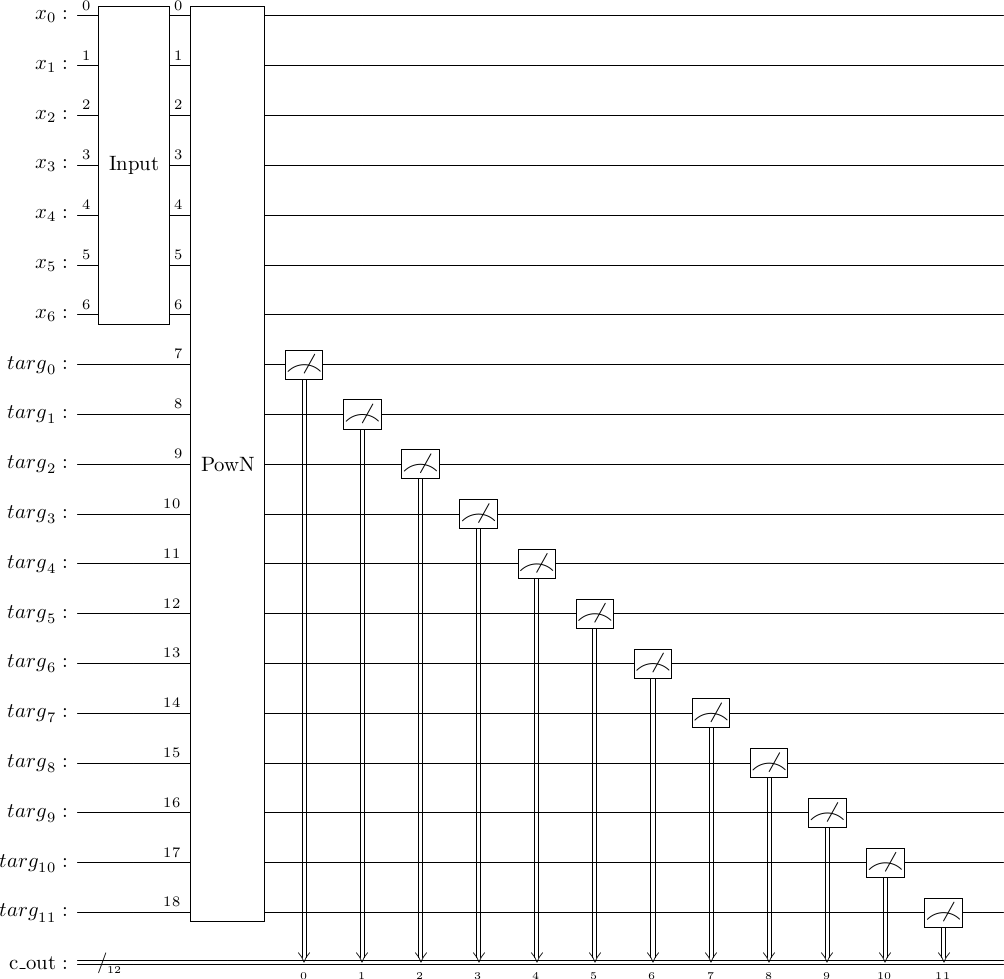

In [10]:
circ.draw('latex')

In [11]:
shots=10
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [12]:
print('Target:')
print(digit,'^'+str(k),'=',target,'->',binary_t)

print('Result:')
for label in hist.keys():
    print(digit,'^'+str(k),'=',qt.bin_to_dec(label, nint=nint, phase=phase),'->',label,'with probability',float(hist[label])/shots)

Target:
10.25 ^2 = 105.0625 -> 011010010001
Result:
10.25 ^2 = 105.0625 -> 011010010001 with probability 1.0


As we can see, we recover the target result!

Let's try again but with a higher exponent. If you are changing the values, remember that computer memory limitations will restrict you to maximum target values:

In [13]:
digit = 1.25
k = 5
target = np.power(digit, k)

print(digit,'^'+str(k),'=',target)

1.25 ^5 = 3.0517578125


In [14]:
nintx = qt.get_nint(digit)
npresx = qt.get_npres(digit)
nx = nintx + npresx + 1
print(nx, nintx, npresx)

4 1 2


In [15]:
nint = qt.get_nint(target)
npres = qt.get_npres(target)
n = nint + npres + 1
print(n, nint)

13 2


In [16]:
phase = True

binary = qt.my_binary_repr(digit, nx, nint=nintx, phase=phase)
binary_t = qt.my_binary_repr(target, n, nint=nint, phase=phase)

In [17]:
qx = QuantumRegister(nx, 'x')
qtarg = QuantumRegister(n,'targ')
c_out = ClassicalRegister(n, 'c_out')
circ = QuantumCircuit(qx, qtarg, c_out)

In [18]:
in_gate = qt.input_bits_to_qubits(binary, circ, reg=qx, wrap=True)
circ.append(in_gate, qx);

In [19]:
power_gate = qt.QFTPowerN(circ, qx, qtarg, k, wrap=True, nintx=nintx, nint=nint)
circ.append(power_gate, [*qx, *qtarg]);

In [20]:
circ.measure(qtarg, c_out);

In [21]:
shots=10
emulator = Aer.get_backend('qasm_simulator')
job = execute(circ, emulator, shots=shots )
hist = job.result().get_counts()

In [22]:
print('Target:')
print(digit,'^'+str(k),'=',target,'->',binary_t)

print('Result:')
for label in hist.keys():
    print(digit,'^'+str(k),'=',qt.bin_to_dec(label, nint=nint, phase=phase),'->',label,'with probability',float(hist[label])/shots)

Target:
1.25 ^5 = 3.0517578125 -> 0110000110101
Result:
1.25 ^5 = 3.0517578125 -> 0110000110101 with probability 1.0


Again, we should recover the desired solution.